# Lesson 3 - Data Clearning and Feature Engineering

> How to prepare data for machine learning algorithms and create new, informative features

## Learning objectives

* Understand the main steps involved in preparing data for machine learning algorithms
* Learn how to treat missing values 
* Get to know categorical variables and one-hot encoding
* Gain an introduction to matplotlib's functionality for combining multiple plots in the same figure

## References

This lesson draws heavily on the following textbook chapter:

* Chapter 2 of _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ by Aurèlien Geron

You may also find the following blog posts useful:

* [Machine Learning with Kaggle: Feature Engineering
](https://www.datacamp.com/community/tutorials/feature-engineering-kaggle)
* Sections 2 and 3 of [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) on Kaggle Learn
* [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html) by C. Moffitt

## Homework

* Revisit the exercises included in this notebook
* Read chapter 3 of _Data Science for Business_ by Provost & Fawcett

## What is data cleaning?

When you receive a new dataset at the beginning of a project, the first task usually involves some form of data cleaning. 

To solve the task at hand, you might need data from multiple sources which you need to combine into one unified table. However, this is usually a tricky task; the different data sources might have different naming conventions, some of them might be human-generated, while others are automatic system reports. A list of things you usually have to go through are the following:

* Merge multiple sources into one table
* Remove duplicate entries
* Clean corrupted entries
* Handle missing data

In lesson 2, we examined how to merge the table of housing data with their addresses; in this lesson we will focus on the remaining three steps.

Although building algorithms that are able to classify data or estimate outcomes is arguably the most interesting part of data science, data cleaning is the one that takes up most of the time. According to a study by [CrowdFlower](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#67beee196f63), data scientists spend about 60-80% of their time preparing datasets for machine learning algorithms.


## The data

In this lesson we will analyse the unified table of housing data and their addresses that we created in lesson 2:

* `housing_merged.csv`

## Import libraries

As in previous lessons, we will be making use of the pandas and seaborn libraries.

In [123]:
# data wrangling
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# these commands define the color scheme
sns.set(color_codes=True)
sns.set_palette(sns.color_palette('muted'))

## Load the data

In [124]:
housing_data = pd.read_csv('housing_merged.csv'); housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2005,Tunnel Road,Oakland,94611.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6886,Chabot Road,Oakland,94618.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,6365,Florio Street,Oakland,94618.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6365,Florio Street,Oakland,94618.0


## Feature engineering

Before we prepare the data for training machine learning models, it is useful to experiment with creating new _**features**_ (i.e. columns) that may provide more information than the raw data alone. For example the column `total_rooms` refers to the total number of rooms in a housing district, and thus it is more useful to know the number of rooms per household. In pandas, we can create this new column as follows:

In [125]:
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
# check we have added the column
housing_data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0,6.984127


---

#### Exercise #1

* Create a new feature called `bedrooms_per_household` from the `total_bedrooms` and `households` features
* Create a new feature called `bedrooms_per_room` from the `total_bedrooms` and `total_rooms` features
* Create a new feature called `population_per_household` from the `population` and `households` features
* Recalculate the correlation matrix from lesson 1 - what can you conclude about the correlation of the new features with the median house value?

---

In [126]:
housing_data["bedrooms_per_household"] = housing_data["total_bedrooms"] / housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"] / housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"] / housing_data["households"]

housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2005,Tunnel Road,Oakland,94611.0,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6886,Chabot Road,Oakland,94618.0,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,6365,Florio Street,Oakland,94618.0,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6365,Florio Street,Oakland,94618.0,6.281853,1.081081,0.172096,2.181467


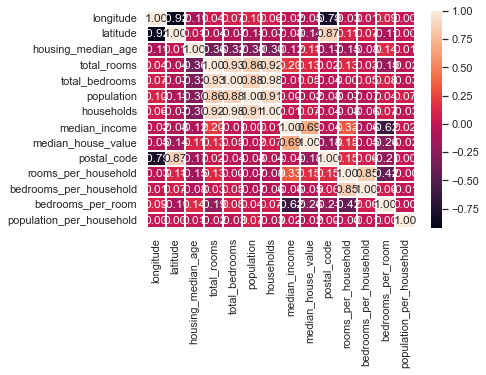

In [127]:
corr = housing_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', linewidth = 2)
sns.set(rc = {'figure.figsize':(15,15)})

## Remove the housing price cap

Recall from lesson 1 that the quantity we wish to predict (median house value) has a cap around $500,000:

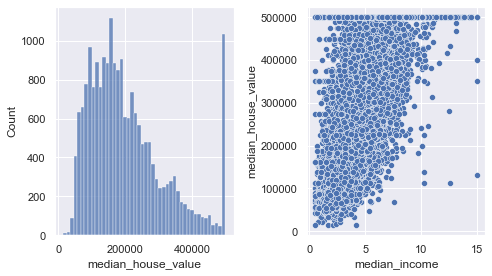

In [128]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4)) # use plt.subplots() to create multiple plots
sns.histplot(housing_data["median_house_value"], kde=False, ax=ax0) # put one plot on axis ax0
sns.scatterplot(x="median_income", y="median_house_value", data=housing_data, ax=ax1) # put second plot on axis ax1
fig.tight_layout() # tight_layout() fixes spacing between plots

> Tip: Up until now, we have always made individual plots to visualise the data. The example above shows how matplotlib can be used to show two plots on the same figure! See the _Effectively Using Matplotlib_ link in the references for more information.

The presence of this cap is potentially problematic since our machine learning algorithms may learn that the housing prices never go beyond that limit. Let's assume that we want to predict housing prices above $500,000, in which case we should remove these districts from the dataset.

---

#### Exercise #2

* Store the number of rows in `housing_data` in a variable called `n_rows_raw`
* Use the `DataFrame.loc[]` method to remove all rows where `median_house_value` is greater than or equal to $500,000
* Calculate the fraction of data that has been removed by this filter.
* Create new histogram and scatter plots to make sure you have removed the capped values correctly.

---

In [129]:
n_rows_raw : int = housing_data.shape[0]

housing_data = housing_data.loc[housing_data["median_house_value"] < 500000]
n_rows_filtered : int = housing_data.shape[0]

print(n_rows_filtered/n_rows_raw)

0.951937984496124


## Convert strings to categories

If we inspect the data types associated with our housing `pandas.DataFrame`

In [130]:
housing_data.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
street_number                object
street_name                  object
city                         object
postal_code                 float64
rooms_per_household         float64
bedrooms_per_household      float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

we see that in addition to numerical features, we have features of `object` data type, which pandas denotes with the string `O`:

In [131]:
housing_data['ocean_proximity'].dtype

dtype('O')

In [132]:
# compare against numerical column
housing_data['median_house_value'].dtype

dtype('float64')

pandas has a handy set of functions to test the data type of each column. For example, to check whether a column is of object or numeric type we can import the following functions

In [133]:
from pandas.api.types import is_object_dtype, is_numeric_dtype

and then test them against some columns:

In [134]:
is_object_dtype(housing_data['ocean_proximity'])

True

In [135]:
is_numeric_dtype(housing_data['ocean_proximity'])

False

In [136]:
is_numeric_dtype(housing_data['median_house_value'])

True

In this case, we know that those object-type columns are _strings_ and some step is needed to convert them to numerical form because most machine learning algorithms are best suited for doing computations on arrays of numbers, not strings.

pandas has a special `Categorical` type for holding data that uses the integer-based categorical representation or **_encoding_**. For example `housing_data['ocean_proximity']` is a `pandas.Series` of Python string objects `['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']`. We can convert a `pandas.DataFrame` column to categorical as follows:

In [137]:
housing_data['ocean_proximity'] = housing_data['ocean_proximity'].astype('category')

The resulting `Categorical` object has `categories` and `codes` attributes that can be accessed as follows:

In [138]:
housing_data['ocean_proximity'].cat.categories

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [139]:
housing_data['ocean_proximity'].cat.codes
#housing_data['ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Length: 19648, dtype: int8

Sometimes we may want to reorder by hand the categorical variables. For example, with our `ocean_proximity` feature, it makes more sense to order the categories by distance to the ocean:

In [140]:
housing_data["ocean_proximity"].cat.set_categories(
    ["INLAND", "<1H OCEAN", "NEAR BAY", "NEAR OCEAN", "ISLAND"], ordered=True, inplace=True
)

> Tip: Instead of doing each data cleaning step manually, it is a good idea to write functions that automate the process. The main benefits from doing so is that you will be able to reproduce your results at a later date and can reuse the functions in future projects. The exercise below is desiged to help you create your first data cleaning function!

---

#### Exercise #3

* Convert all other columns which are of `object` type into `Categorical`.
* Check that the transformed `housing_data` has the expected data types.

---

In [141]:
housing_data.dtypes# check which columns are of 'object' type

longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity             category
street_number                 object
street_name                   object
city                          object
postal_code                  float64
rooms_per_household          float64
bedrooms_per_household       float64
bedrooms_per_room            float64
population_per_household     float64
dtype: object

In [142]:
housing_data['street_number'] = housing_data['street_number'].astype('category')
housing_data['street_name'] = housing_data['street_name'].astype('category')
housing_data['city'] = housing_data['city'].astype('category')
housing_data.dtypes # check which columns are of 'object' type

longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity             category
street_number               category
street_name                 category
city                        category
postal_code                  float64
rooms_per_household          float64
bedrooms_per_household       float64
bedrooms_per_room            float64
population_per_household     float64
dtype: object

In [143]:
import custom_methods
df = custom_methods.dtype_as_category(housing_data)


## Dealing with missing values

In general, machine learning algorithms will fail to work with missing data, and in general you have three options to handle them:

* Get rid of the corresponding rows
* Get rid of the whole feature or column
* Replace the missing values with some value like zero or the mean, median of the column.

A quick way to check if there's any missing data is to run the pandas `DataFrame.isna()` or `DataFrame.info()` methods:

In [144]:
housing_data.info()
housing_data.isna().sum().sum() # count the missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 19648 non-null  float64 
 1   latitude                  19648 non-null  float64 
 2   housing_median_age        19648 non-null  float64 
 3   total_rooms               19648 non-null  float64 
 4   total_bedrooms            19448 non-null  float64 
 5   population                19648 non-null  float64 
 6   households                19648 non-null  float64 
 7   median_income             19648 non-null  float64 
 8   median_house_value        19648 non-null  float64 
 9   ocean_proximity           19648 non-null  category
 10  street_number             18112 non-null  category
 11  street_name               19144 non-null  category
 12  city                      19488 non-null  category
 13  postal_code               19492 non-null  floa

2956

Find the columns with missing values. You can see the columns that have missing values in the output from `housing_data.info()` or when using `isna()`:



In [145]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'street_number', 'street_name',
       'city', 'postal_code', 'rooms_per_household', 'bedrooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [146]:
housing_data.isna().any() #isna() acts on columns, any() returns TRUE if any element is TRUE

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms               True
population                  False
households                  False
median_income               False
median_house_value          False
ocean_proximity             False
street_number                True
street_name                  True
city                         True
postal_code                  True
rooms_per_household         False
bedrooms_per_household       True
bedrooms_per_room            True
population_per_household    False
dtype: bool

We can see that the following columns contain missing values:

* `total_bedrooms`
* `street_number`
* `street_name`
* `city`
* `postal_code`
* `bedrooms_per_household`
* `bedrooms_per_room`

An alternative way to verify this is to apply the `DataFrame.isnull()` method and calculate the sum of missing values in `housing_data`:

In [147]:
housing_data.isnull().sum()

longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms               200
population                     0
households                     0
median_income                  0
median_house_value             0
ocean_proximity                0
street_number               1536
street_name                  504
city                         160
postal_code                  156
rooms_per_household            0
bedrooms_per_household       200
bedrooms_per_room            200
population_per_household       0
dtype: int64

---

#### Exercise #4

It is often more informative to know the fraction or percentage of missing values in a `pandas.DataFrame`. Calculate the _fraction_ of missing values in `housing_data` and sort them in descending order.


---

In [148]:
na_frac= housing_data.isna().sum().sum() / (housing_data.shape[0]*housing_data.shape[1])
round(na_frac*100,2) # Fraction in %

0.84

In [149]:
round(housing_data.isnull().sum()/housing_data.shape[0]*100,2) #fractions in % 

longitude                   0.00
latitude                    0.00
housing_median_age          0.00
total_rooms                 0.00
total_bedrooms              1.02
population                  0.00
households                  0.00
median_income               0.00
median_house_value          0.00
ocean_proximity             0.00
street_number               7.82
street_name                 2.57
city                        0.81
postal_code                 0.79
rooms_per_household         0.00
bedrooms_per_household      1.02
bedrooms_per_room           1.02
population_per_household    0.00
dtype: float64

### Getting rid of rows

Let's look at our first option to handle missing data: getting rid of rows. One candidate for this is the `city` column since dropping the 188 rows amounts to less than 1% of the total dataset. To achieve this we can use the `DataFrame.dropna()` method as follows:

In [150]:
housing_data.dropna(subset=['city'], inplace=True)
# check city has no missing values
housing_data['city'].isnull().sum()

0

---

#### Exercise #5

* Use the same technique as above to remove the rows where the `postal_code` values are missing
* Use the `Series.astype()` method to convert the `postal_code` to `int` type

---

In [151]:
housing_data.dropna(subset=["postal_code"], inplace = True)
housing_data["postal_code"].isnull().sum()

0

In [152]:
housing_data["postal_code"] = housing_data["postal_code"].astype(int)

### Getting rid of whole features

We still have missing values for the categorical features `street_number` and `street_name`. For such data one simple approach is to replace the missing values with the _most frequent entry_. However, for these specific attributes it does not make much sense to replace e.g. the missing street names with the most common ones in some other city.

To that end, we will drop the `street_number` and `street_name` columns.

---

#### Exercise #6

Drop the `street_number`, `street_name` and `postal_code` columns from `housing_data`

---

In [153]:
for column in ["street_number", "street_name", "postal_code"]:
    try:        housing_data.drop(labels = column, axis = 1, inplace = True);print("Removed:\t\t", column)
    except:     print("No column named:\t", column)


Removed:		 street_number
Removed:		 street_name
Removed:		 postal_code


### Fill missing values

For the numerical columns, let's replace the missing values by the median. 

> Note: We choose the median since it is more robust to outliers than the mean, but in general one should experiment with different combinations.

For example, with `total_bedrooms` this might look like the following:

In [154]:
total_bedrooms_median = housing_data['total_bedrooms'].median() # calculate median total number of bedrooms
housing_data['total_bedrooms'].fillna(total_bedrooms_median, inplace=True) # use inplace=True to make replacement in place
housing_data['total_bedrooms'].isnull().sum() # check replacement worked

0

Although doing this replacement manually for each numerical column is feasible for this small dataset, it would be much better to have a function that automates this process.

---

#### Exercise #7

Check if all missing values have been filled in the `housing_data` dataframe.

---

In [155]:
import custom_methods

housing_data = custom_methods.fill_numeric_na(housing_data, method="median")

In [156]:
housing_data.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
city                        0
rooms_per_household         0
bedrooms_per_household      0
bedrooms_per_room           0
population_per_household    0
dtype: int64

## Convert categories to numbers

We've now reached the stage where we have a cleaned `pandas.DataFrame` and the final step is to convert our categorical columns to numerical form. For example, we can make the `city` column numerical by replacing the categories with their corresponding codes: 

In [157]:
print(housing_data['city'], housing_data['city'].cat.codes)  # The city names have associated category numbers 

0            Berkeley
1             Oakland
2             Oakland
3             Oakland
4             Oakland
             ...     
20634      Marysville
20635    Camptonville
20637         Dobbins
20638        Rackerby
20639    Oregon House
Name: city, Length: 19443, dtype: category
Categories (977, object): ['Acampo', 'Acton', 'Adelanto', 'Adin', ..., 'Yuba City', 'Yucaipa', 'Yucca Valley', 'Zenia'] 0         68
1        619
2        619
3        619
4        619
        ... 
20634    529
20635    133
20637    238
20638    715
20639    636
Length: 19443, dtype: int16


In [158]:
housing_data['city'] = housing_data['city'].cat.codes + 1 # replaces city names by "category codes + 1" (start from 1)
housing_data.head(10) # check output

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,city,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,69,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,620,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,620,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,620,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,620,6.281853,1.081081,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,620,4.761658,1.103627,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,620,4.931907,0.951362,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,620,4.797527,1.061824,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,620,4.294118,1.117647,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,620,4.970588,0.990196,0.199211,2.172269


One potential problem with the above representation is that machine learning algorithms will treat two cities that are numerically close to each other as being similar. Thus an alternative approach is to apply a technique known as _one-hot encoding_, where we create a binary feature per category. In pandas we can do this by simply running `pandas.get_dummies()`:

In [159]:
# Let's take a look at our dataset before the one-hot encoding:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,city,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,69,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,620,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,620,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,620,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,620,6.281853,1.081081,0.172096,2.181467


In [160]:
housing_data = pd.get_dummies(housing_data)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,city,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,69,6.984127,1.023810,0.146591,2.555556,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,620,6.238137,0.971880,0.155797,2.109842,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,620,8.288136,1.073446,0.129516,2.802260,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,620,5.817352,1.073059,0.184458,2.547945,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,620,6.281853,1.081081,0.172096,2.181467,0,0,1,0,0


Note that the above has converted our `ocean_proximity` column into one new column per category!

> Note: For columns with hundreds or thousands of categories, one-hot encoding may not be ideal as it will create a large number of columns and slow down the training phase of your analysis. For this reason we did not one-hot encode the `city` or `post_code` columns, even though they are strictly categorical. (We converted the category type of 'city' to numerical type to prevent a one-hot encoding of 'city' when calling the 'get_dummies()' method above.)

In [161]:
# sanity check
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19443 entries, 0 to 20639
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19443 non-null  float64
 1   latitude                    19443 non-null  float64
 2   housing_median_age          19443 non-null  float64
 3   total_rooms                 19443 non-null  float64
 4   total_bedrooms              19443 non-null  float64
 5   population                  19443 non-null  float64
 6   households                  19443 non-null  float64
 7   median_income               19443 non-null  float64
 8   median_house_value          19443 non-null  float64
 9   city                        19443 non-null  int16  
 10  rooms_per_household         19443 non-null  float64
 11  bedrooms_per_household      19443 non-null  float64
 12  bedrooms_per_room           19443 non-null  float64
 13  population_per_household    194

## Save processed data to disk

In [164]:
housing_data.to_csv('housing_processed.csv', index=False) # MY/PATH/'housing_processed.csv'